<a href="https://colab.research.google.com/github/Mutekanga/Countries_Of_the_world/blob/main/CountriesOfTheWorld_Project_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This Data set is a world fact sheet that shows an analysis on the of countries the world and various attributes associated with the various countries. This research project intends to assess the effect and or correlation of GDP and Death rate and infant mortality if any. Other factors I would like to explore are the deathrate per region, birthrate per region, level of service and industry in regions.

First i'll load all the neccessary libraries onto the notebook, i describe some of the functions that the different libraries are going to perform.

In [ ]:
#import neccessary libraries  
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from matplotlib import pyplot as plt  # plotting
import seaborn as sns 
import os # accessing directory structure
from scipy import stats

Next i'll load the data frame on to the notebook using the pd.read

In [ ]:
#import data frame on to jupyter notebook and assign it a variable name. 
world_data = pd.read_csv(r"C:\project_data\countriesoftheworld.csv")

Next i'll do some exploratory analysis and get a structure of the data in the data frame by getting a sample of the data to get an idea odf the nature of data i'll be dealing with. Here i'll get a sample of 5 items in the data structure.

In [ ]:
#get sample of the data to view data structure
#limit columns
#will limmit columns to five columns.
world_data.sample(5) 

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
187,Solomon Islands,OCEANIA,552438,28450,"19,4","18,67",0,"21,29",1700.0,NaN,"13,4","0,64",2,"97,36",2,"30,01","3,92","0,42","0,11","0,47"
221,Wallis and Futuna,OCEANIA,16025,274,"58,5","47,08",NaN,NaN,3700.0,"50,0","118,6",5,25,70,2,NaN,NaN,NaN,NaN,NaN
46,"Congo, Repub. of the",SUB-SAHARAN AFRICA,3702314,342000,"10,8","0,05","-0,17","93,86",700.0,"83,8","3,7","0,51","0,13","99,36",2,"42,57","12,93","0,062","0,57","0,369"
92,Hungary,EASTERN EUROPE,9981334,93030,"107,3","0,00","0,86","8,57",13900.0,"99,4","336,2","50,09","2,06","47,85",3,"9,72","13,11","0,037","0,312","0,651"
115,Lebanon,NEAR EAST,3874050,10400,"372,5","2,16",0,"24,52",4800.0,"87,4","255,6","16,62","13,98","69,4",NaN,"18,52","6,21","0,12","0,21","0,67"


Next i'll use isna().any() function is used to detect missing values. It return a boolean same-sized object indicating if the values are NA. NA values here will get mapped to boolean values.

In [ ]:
#checking for missing values in this series object
#returns boolean values. 
print(world_data.isna().any())

Country                               False
Region                                False
Population                            False
Area (sq. mi.)                        False
Pop. Density (per sq. mi.)            False
Coastline (coast/area ratio)          False
Net migration                          True
Infant mortality (per 1000 births)     True
GDP ($ per capita)                     True
Literacy (%)                           True
Phones (per 1000)                      True
Arable (%)                             True
Crops (%)                              True
Other (%)                              True
Climate                                True
Birthrate                              True
Deathrate                              True
Agriculture                            True
Industry                               True
Service                                True
dtype: bool


using the Pandas dataframe.info() function I'll get a concise summary of the dataframe to further explore the dataset. this function gives me a quick overview of the dataset we use the dataframe.info() function.

In [ ]:
#print out a concise summary of a DataFrame and get classification and certain attributes on information about a DataFrame
#includes the index dtype and column dtypes
print(world_data.info())                    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

Using the head() function, I'll check to see if my data object has the right type of data in it. This function will get the first n rows for my data and will base the result on their position.

In [ ]:
#Key attributes of the data to be explored and categorised.
#categorised by headers.
#get the first n rows using this function.
print(world_data.head())

           Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         23,06                     

Next in my exploratory analysis i'll use dtypes object to find or list the aspects if the data, ie the data types and how python will categorise the data in terms of types

In [ ]:
#printing out the data Types in the data set 
print(world_data.dtypes)

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object


Using the Pandas describe() funciton I'll view some basic statistical details about my data frame, like percentile, mean, std etc. this method will perform descriptive analysis.

In [ ]:
#perform intial descriptive statistics on data 
print(world_data.describe())

         Population  Area (sq. mi.)  GDP ($ per capita)
count  2.270000e+02    2.270000e+02          226.000000
mean   2.874028e+07    5.982270e+05         9689.823009
std    1.178913e+08    1.790282e+06        10049.138513
min    7.026000e+03    2.000000e+00          500.000000
25%    4.376240e+05    4.647500e+03         1900.000000
50%    4.786994e+06    8.660000e+04         5550.000000
75%    1.749777e+07    4.418110e+05        15700.000000
max    1.313974e+09    1.707520e+07        55100.000000


Next i'll replace the Null values as floats or intergers

In [ ]:
# null values can be replaced as floats or int 

In [ ]:

world_data["Literacy (%)"] = world_data["Literacy (%)"].str.replace("," , ".").astype("float64")
world_data["Net migration"] = world_data["Net migration"].str.replace("," , ".").astype("float64")
world_data ["Birthrate"] = world_data["Birthrate"].str.replace("," , ".").astype("float64")
world_data["Deathrate"] = world_data["Deathrate"].str.replace("," , ".").astype("float64")
world_data["Agriculture"] = world_data["Agriculture"].str.replace("," , ".").astype("float64")
world_data["Industry"] = world_data["Industry"].str.replace("," , ".").astype("float64")
world_data["Service"] = world_data["Service"].str.replace("," , ".").astype("float64")

Next will use the fillna() function to manage and remove Null values from a data frame, in this case i'll replace the Null values with the boolean value True

In [ ]:
#here we shall replace the null values with boolean True.  
world_data.fillna(0, inplace=True)    

Next i'll group the countries data by region and based on the region with the highest GDP using thr grouby function and then print it out. Here we can see that The Region with the highest GDP is Northern America and the Region with the lowest GDP is Sub-saharan Africa.

We shall create a graph later on in the notebook to visualize these results.

In [ ]:
#Print out the country data by region and GDP per Capita 
print(world_data.groupby('Region')[['GDP ($ per capita)']].median())

                                     GDP ($ per capita)
Region                                                 
ASIA (EX. NEAR EAST)                             3450.0
BALTICS                                         11400.0
C.W. OF IND. STATES                              3450.0
EASTERN EUROPE                                   9100.0
LATIN AMER. & CARIB                              6300.0
NEAR EAST                                        9250.0
NORTHERN AFRICA                                  5000.0
NORTHERN AMERICA                                29800.0
OCEANIA                                          5000.0
SUB-SAHARAN AFRICA                               1300.0
WESTERN EUROPE                                  27200.0


Next I'll plot a Bar graph to futher show which region has the Highest GDP per capita. 

From the graph we can see that sub-saharan Africa is the lowest and the regions with the highest GDP per capita is Northern America and Western Europe

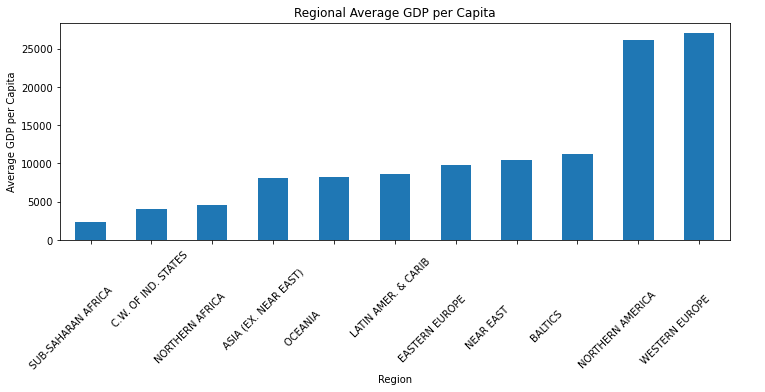

In [ ]:
#Bar Graph of Regional Average GDP Per Capita
fig = plt.figure(figsize=(12, 4))
world_data.groupby('Region')['GDP ($ per capita)'].mean().sort_values().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Regional Average GDP per Capita')
plt.xlabel("Region")
plt.ylabel('Average GDP per Capita')
plt.show()


Now I'll create a visual to show the No. of countries in the per region. 

Its interesting to see from the graph that shown that sub saharan Africa has the most number of countries as opposed to other regions. 

It may not explain the correlation between the low GDP but it certainly brings up a worth while debate. 


Text(0.5, 1.0, 'Countries by Region')

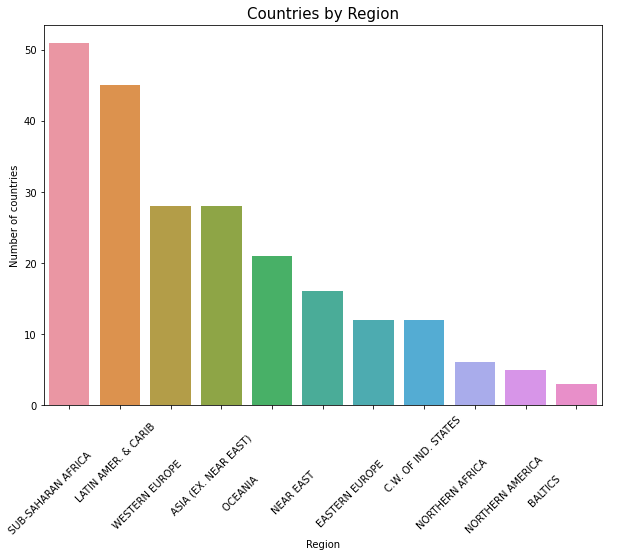

In [ ]:
#No of countries by region 
#Group Countries by Region 
#This graph will show us the number of countries for every region. From the graph, its shown that sub saharan Africa has
#the most number of countries as opposed to other regions. 


region = world_data.Region.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=region.index,y=region.values)
plt.xticks(rotation=45)
plt.ylabel('Number of countries')
plt.xlabel('Region')
plt.title('Countries by Region',color = 'black',fontsize=15)

I'll further explore the GDP distribution, this time by country. I'll sample 30 countries for this visual. 

From the visual Luxermbourg has a much higher GDP than all the other countries followed by Norway then USA, Its interesting to note too that all the 30 countries sampled with the highest GDP per capita are all above the mean of the world GDP per capita.  

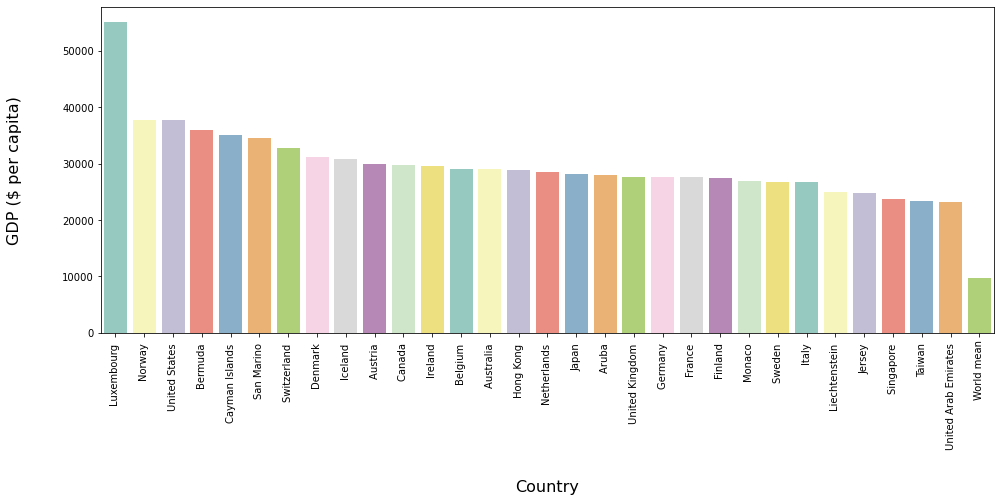

In [ ]:
#BAR GRAPH OF GDP VS COUNTRY
#this graph shows the GDP of country per capita. No of countries sampled here were 30 countries. 

fig, ax = plt.subplots(figsize=(16,6))
top_gdp_countries = world_data.sort_values('GDP ($ per capita)',ascending=False).head(30)
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[world_data['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP ($ per capita)']],mean],ignore_index=True)
sns.barplot(x='Country', y='GDP ($ per capita)', data=gdps, palette='Set3')
ax.set_xlabel(ax.get_xlabel(), labelpad=30)
ax.set_ylabel(ax.get_ylabel(), labelpad=40)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

I also will go ahead and explore the countries with the highest populations. for this visual i'll use a sample of 40 countries. China and india from this visual clearly have the highest population by far incomparision to the other top 40 countries. China having the highest.

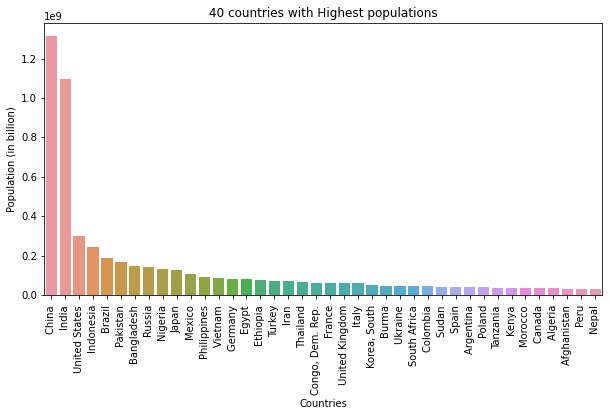

In [ ]:
#This graph shows the forty countries with the most population, grouped in billions. 

mostPop40Data = world_data.sort_values("Population", ascending = False).head(40)
plt.figure(figsize = (10,5))
sns.barplot(x = mostPop40Data["Country"], y = mostPop40Data["Population"])
plt.xticks(rotation = 90)
plt.title("40 countries with Highest populations")
plt.xlabel("Countries")
plt.ylabel("Population (in billion)") 
plt.show()

Next i'll perform a t-test to test the research question(hypothesis) that the death-rate of the countries with the highGDP is equal to the death-rate of the countries with lowGDP

Null hypothesis states that the countries that have a low GDP have a simmilar Death rate as the countries with a higher GDP

Ho: μ1 - μ2 = 0

Ha: μ1 - μ2 ≠ 0

In [ ]:
#get details of the sample using info()

In [ ]:
highGDPData.info()                                                                                 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 121 to 100
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             40 non-null     object 
 1   Region                              40 non-null     object 
 2   Population                          40 non-null     int64  
 3   Area (sq. mi.)                      40 non-null     int64  
 4   Pop. Density (per sq. mi.)          40 non-null     object 
 5   Coastline (coast/area ratio)        40 non-null     object 
 6   Net migration                       40 non-null     float64
 7   Infant mortality (per 1000 births)  40 non-null     object 
 8   GDP ($ per capita)                  40 non-null     float64
 9   Literacy (%)                        40 non-null     float64
 10  Phones (per 1000)                   40 non-null     object 
 11  Arable (%)                          40 non-n

In [ ]:
lowGDPData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 58 to 145
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             40 non-null     object 
 1   Region                              40 non-null     object 
 2   Population                          40 non-null     int64  
 3   Area (sq. mi.)                      40 non-null     int64  
 4   Pop. Density (per sq. mi.)          40 non-null     object 
 5   Coastline (coast/area ratio)        40 non-null     object 
 6   Net migration                       40 non-null     float64
 7   Infant mortality (per 1000 births)  40 non-null     object 
 8   GDP ($ per capita)                  40 non-null     float64
 9   Literacy (%)                        40 non-null     float64
 10  Phones (per 1000)                   40 non-null     object 
 11  Arable (%)                          40 non-nu

using the ttest_ind() function I'll perform a t-test for these two samples.

The t-test will compare the means of these two samples and give a value that indicates how different these two means are. It will also give a p-value indicating how likely it is that this difference is due to random chance

In [ ]:
stats.ttest_ind(highGDPData["Deathrate"], lowGDPData["Deathrate"])

Ttest_indResult(statistic=-5.779691570296129, pvalue=1.4675699956624742e-07)

There is a difference of 5.7 standard deviations between high GDP countries and the low GDP countries. But is this just due to random chance, or is that difference significant?

With a low p-value of 1.4e-07, that's enough to reject the null hypothesis implying that there is a real difference between the death rate of the countries with high GDP and those with a lower GDP

Next I'll visualize the deathrates of countries with a HIgh GDP and the countries with a low GDP using a sample of 40 countries to see if there's a trend.

From the graph except for a few outliers there seems to be a trend showing low GDP countries have got a higher Death rate than high GDP countries.

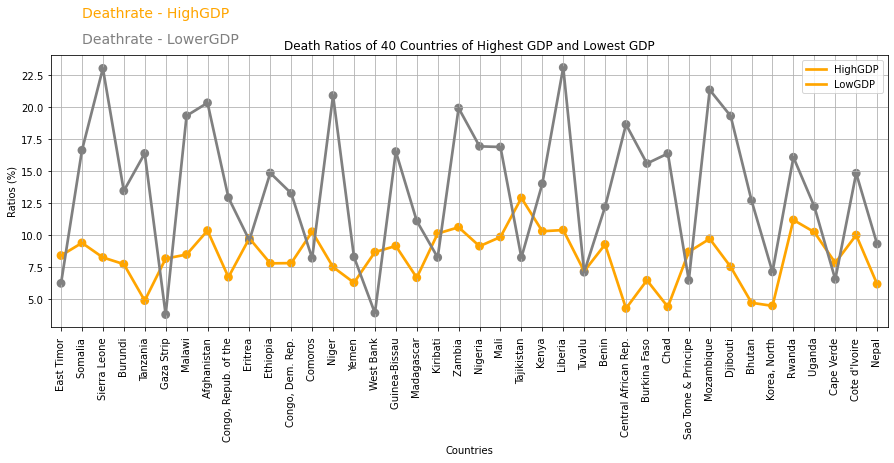

In [ ]:
#Analysis of Deathrate of Countries with high GDP Vs Low GDP - 

highGDPData = world_data.sort_values("GDP ($ per capita)", ascending = False).head(40)
lowGDPData = world_data[world_data["GDP ($ per capita)"] != 0].sort_values("GDP ($ per capita)", ascending = True).head(40)

plt.figure(figsize = (15, 5))
sns.pointplot(x = highGDPData["Country"], y = highGDPData["Deathrate"], color = "orange", alpha = 0.8)
sns.pointplot(x = lowGDPData["Country"], y = lowGDPData["Deathrate"], color = "grey", alpha = 0.6)
plt.text(1, 27, "Deathrate - HighGDP", color = "orange", fontsize = 14)
plt.text(1, 25, "Deathrate - LowerGDP", color = "grey", fontsize = 14)
plt.xticks(rotation = 90)
plt.title("Death Ratios of 40 Countries of Highest GDP and Lowest GDP")
plt.xlabel("Countries")
plt.ylabel("Ratios (%)")
plt.legend(["HighGDP", "LowGDP "])
plt.grid()
plt.show()


I'll also explore the regions with the highest deathrates. Its interesting to see that the regions we earlier saw with a lower GDP have the highest Birthrate as well, the SUB-SAHARAN AFRICA region having the highest birthrate

i'll visualize it to show this point more clearly.

In [ ]:
#lets explore the Birth rate of the different countries>

I'll use a scatter plot to further visualize the birth and death-rates  will dot plot the GPD Vs the birth-rate 
Its interesting to see that birthrate seems to be significantly higher in the countries with the Lowest GDP and appears to be alot less in countries with a higher GDP 

<Figure size 720x360 with 0 Axes>

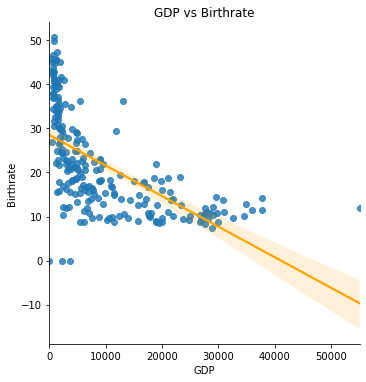

In [ ]:
#Will dot plot the GPD Vs the birth-rate

plt.figure(figsize = (10, 5))
sns.lmplot(x = "GDP ($ per capita)", y = "Birthrate", data = world_data, line_kws={'color': 'orange'})
plt.xlabel("GDP")
plt.ylabel("Birthrate")
plt.title("GDP vs Birthrate")
plt.show()

I will dot plot the GPD Vs the Death-rate. This Graph shows the correlation between the Death-rate and the GDP of the countries and it looks like the Deathrate is high in some countries with the highest GDP. 


The Deathrate seems to not have a higher variance as the GDP of countries increase with some outliners. Its important to note that theres many countries too that have a lower GDP and a v.low Deathrate in comparision with the countries with a higher GDP 

<Figure size 720x360 with 0 Axes>

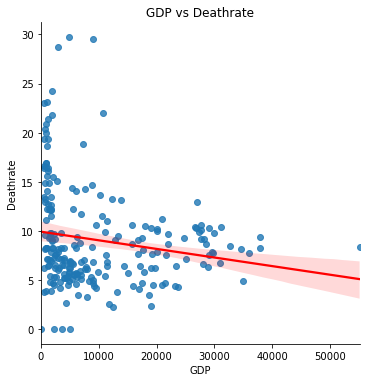

In [ ]:

plt.figure(figsize = (10, 5))
sns.lmplot(x = "GDP ($ per capita)", y = "Deathrate", data = world_data, line_kws={'color': 'red'})
plt.xlabel("GDP")
plt.ylabel("Deathrate")
plt.title("GDP vs Deathrate")
plt.show()

The last visual i'll explore is the infant mortality rate's correlation to the coountries GDP, It seems from the scatter plot, the countries with the higher GDP have a less infant mortality rate and the countries with lower GDP have a higher infant mortality rate. 

<Figure size 720x360 with 0 Axes>

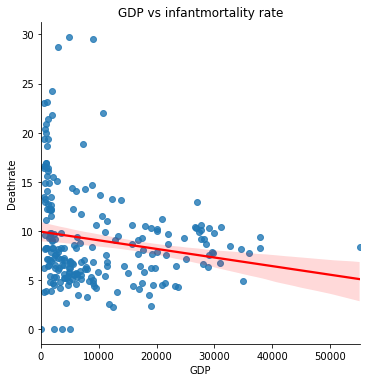

In [ ]:
plt.figure(figsize = (10, 5))
sns.lmplot(x = "GDP ($ per capita)", y = "Deathrate", data = world_data, line_kws={'color': 'red'})
plt.xlabel("GDP")
plt.ylabel("Deathrate")
plt.title("GDP vs infantmortality rate")
plt.show()

#Conclusions: 
The GDP per capita for sub-saharan Africa is the lowest and the regions with the highest GDP per capita is Northern America and Western Europe. It is also interesting that the sub-saharan region of africa is also the region with the most number of countries. 

From this analysis, we can also see that there is a negative correlation between the GDP and the Birthrate in countries. countries with higher GDP tend to have a lower Birth-rate and the reverse is true. 


ftom the independent t-test we have basis to reject the hypothesis that the death rate in High GDP countries is simmilar to the death-rate of countries with low GDP.


Its interesting to note also that Countries with a low GDP also have a higher death rate realtive to the countries with a higher GDP but have a much higher birthrate than the death rate. 

Therefore although it may seem like the Countries with a low GDP have a higher death rate, they still maintain high population growth because of a high birthrate. 
